In [9]:
# Load required libraries
require(cluster);require(dplyr);require(igraph);require(ggnetwork)

In [2]:
# Prepare the data
df <- iris %>% mutate(ID = as.factor(seq(1:nrow(iris))))

In [3]:
# Calculate dissimilarity matrix using Manhattan distance
dissMat <- cluster::daisy(df[,-c(5,6)], metric="manhattan")

In [4]:
# Create an undirected graph from the dissimilarity matrix
undirected_graph <- igraph::graph.adjacency(
  as.matrix(dissMat),
  mode="undirected",
  weighted=TRUE,
  diag=FALSE
) %>% simplify(., remove.multiple = TRUE, remove.loops = TRUE)

In [5]:
# Set edge weights to their absolute values
E(undirected_graph)$weight <- abs(E(undirected_graph)$weight)

# Remove any vertices with no edges
undirected_graph <- delete.vertices(undirected_graph, degree(undirected_graph) == 0)

In [6]:
# Compute minimum spanning tree using Prim's algorithm
net <- mst(undirected_graph, algorithm = "prim")

In [7]:
# Convert the graph to a ggnetwork object and join with the original data
gnet <- ggnetwork(net) 
gnet <- gnet %>% mutate(ID = as.factor(name)) %>% left_join(df)

Joining, by = "ID"


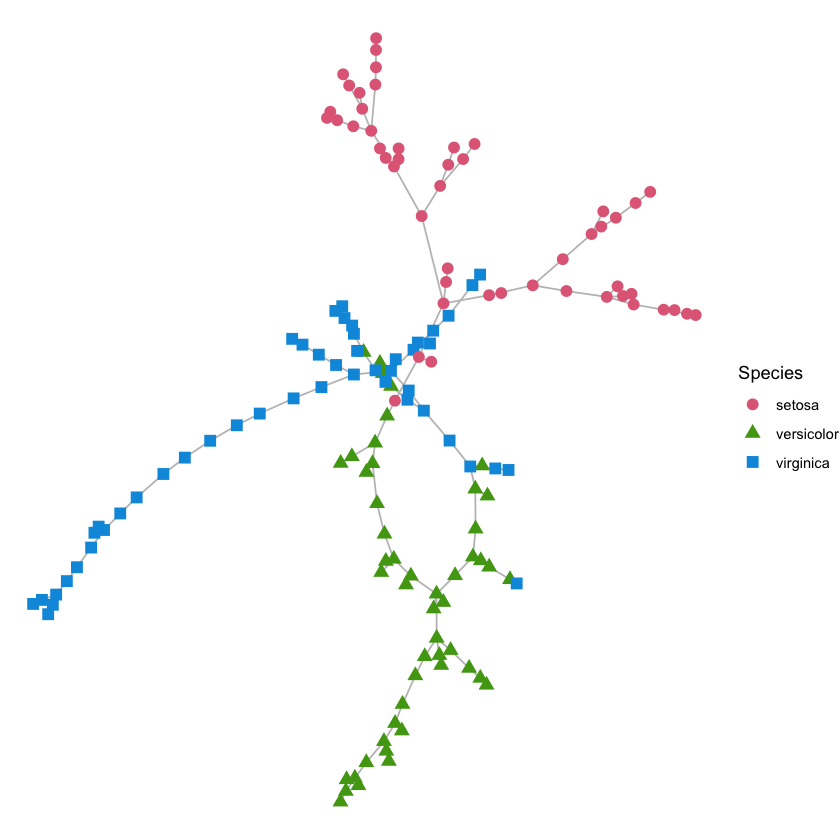

In [8]:
# Plot the network with ggplot
ggplot(gnet, aes(x = x, y = y, xend = xend, yend = yend)) +
    geom_edges(color = "grey75") +
    geom_nodes(aes(color = Species,shape=Species),size = 3 )+
    theme_void() +
    theme(legend.position="right")  +
    colorspace::scale_color_discrete_qualitative(name="Species") 